In [ ]:
#import packages
import requests
import json
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import date
import os
import openai
import re
from pathlib import Path

In [2]:
today = date.today()


In [3]:
password = pd.read_csv("passwords.csv")
password_nps = password["password"][0]


In [4]:
path = "./Reference data/Park Unit Scraping Information.csv"
parks = pd.read_csv(path, encoding='latin-1')
parks.head()

,Park Name,Park Full Name,Type of Unit,State,Reg,Alpha,Unit
0,Alagnak,Alagnak Wild River,Wild River,AK,AKR,ALAG,1
1,Aniakchak,Aniakchak National Monument and Preserve,National Monument & Preserve,AK,AKR,ANIA,2
2,Bering Land Bridge,Bering Land Bridge National Preserve,National Preserve,AK,AKR,BELA,1
3,Cape Krusenstern,Cape Krusenstern National Monument,National Monument,AK,AKR,CAKR,1
4,Denali,Denali National Park and Preserve,National Park & Preserve,AK,AKR,DENA,2


In [5]:
#pull API using API key
road_events_url = "https://developer.nps.gov/api/v1/roadevents?api_key=" + password_nps

response_API = requests.get(road_events_url)
#print(response_API.status_code)
data = response_API.text
df = json.loads(data)

In [6]:
#summarize the data by park
park_list = []
for x in df["features"]:
    for y in df["road_event_feed_info"]['data_sources']:
        if y['data_source_id']==x['properties']['core_details']['data_source_id']:
            park_list.append(y['organization_name'])

park_df = Counter(park_list)
park_df = pd.DataFrame.from_dict(park_df, orient="index").reset_index().rename(
    columns={'index': 'park',
            0:'number of alerts'}).sort_values(by=['number of alerts'])


In [7]:
park_df

,park,number of alerts
6,Buffalo National River,2
5,Mount Rainier,2
9,Guadalupe Mountains National Park,2
8,Ozark National Scenic Riverways,2
1,Katahdin Woods and Waters National Monument,4
13,Big Thicket,4
3,Yosemite National Park,4
7,Grand Canyon National Park,6
12,Lassen Volcanic,10
11,Delaware Water Gap,10


In [8]:
# Get today's date as a string
today = datetime.date.today()
today_string = today.strftime('%Y-%m-%d')

park_df['date'] = today_string

In [9]:
len(park_df), sum(park_df['number of alerts']), max(park_df['number of alerts'])

(14, 209, 102)

In [10]:
# Loop through the API entries
counter=0

park_list = []
alert_name_list = []
description_list = []
event_type_list = []
road_name_list = []
vehicle_impact_list = []
start_date_list = []
end_date_list = []
today_date_list = []
id_list = []


for x in df["features"]:
    for y in df["road_event_feed_info"]['data_sources']:
        if y['data_source_id']==x['properties']['core_details']['data_source_id']:
            print("Park:", y['organization_name'])
            park_list.append(y['organization_name'])
    print("Alert name: ", x['properties']['core_details']['name'])
    print("Description: ", x['properties']['core_details']['description'])
    print("Event type: ", x['properties']['core_details']['event_type'])
    print("Road name: ", x['properties']['core_details']['road_names'])
    print("Vehicle impact: ", x['properties']['vehicle_impact'])
    print("Alert ID: ", x['properties']['core_details']['data_source_id'])
    try:
        print("Dates: ", x['properties']['start_date'], "to ", x['properties']['end_date'])
    except:
        pass
    print("")
    alert_name_list.append(x['properties']['core_details']['name'])
    description_list.append(x['properties']['core_details']['description'])
    event_type_list.append(x['properties']['core_details']['event_type'])
    road_name_list.append(x['properties']['core_details']['road_names'])
    vehicle_impact_list.append(x['properties']['vehicle_impact'])
    start_date_list.append(x['properties']['start_date'])
    id_list.append(x['properties']['core_details']['data_source_id'])
   # end_date_list.append(x['properties']['end_date'])
    today_date_list.append(today_string)
    counter+=1

Park: Crater Lake National Park
Alert name:  North Entrance Road and Rim Drive are CLOSED for the Season
Description:  Seasonal closure of North Entrance Road and Rim Drive due to snow from October through June. 
Event type:  incident
Road name:  ['North Entrance Road', 'West Rim Drive', 'East Rim Drive']
Vehicle impact:  all-lanes-closed
Alert ID:  02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2
Dates:  2025-10-10T07:00:00Z to  2026-07-01T06:59:59Z

Park: Crater Lake National Park
Alert name:  North Entrance Road and Rim Drive are CLOSED for the Season
Description:  Seasonal closure of North Entrance Road and Rim Drive due to snow from October through June. 
Event type:  incident
Road name:  ['North Entrance Road', 'West Rim Drive', 'East Rim Drive']
Vehicle impact:  all-lanes-closed
Alert ID:  02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2
Dates:  2025-10-10T07:00:00Z to  2026-07-01T06:59:59Z

Park: Crater Lake National Park
Alert name:  North Entrance Road and Rim Drive are CLOSED for the Season
Descrip

In [11]:
df_update = pd.DataFrame({
    "date":today_date_list,
    "park":park_list,
    "alert name": alert_name_list,
    "description": description_list,
    "event type": event_type_list,
    "road name": road_name_list,
    "vehicle impact": vehicle_impact_list,
    "event start date": start_date_list,
    "alert_id": id_list
#    "event end date": end_date_list
})
df_update.head()

,date,park,alert name,description,event type,road name,vehicle impact,event start date,alert_id
0,2025-12-11,Crater Lake National Park,North Entrance Road and Rim Drive are CLOSED f...,Seasonal closure of North Entrance Road and Ri...,incident,"[North Entrance Road, West Rim Drive, East Rim...",all-lanes-closed,2025-10-10T07:00:00Z,02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2
1,2025-12-11,Crater Lake National Park,North Entrance Road and Rim Drive are CLOSED f...,Seasonal closure of North Entrance Road and Ri...,incident,"[North Entrance Road, West Rim Drive, East Rim...",all-lanes-closed,2025-10-10T07:00:00Z,02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2
2,2025-12-11,Crater Lake National Park,North Entrance Road and Rim Drive are CLOSED f...,Seasonal closure of North Entrance Road and Ri...,incident,"[North Entrance Road, West Rim Drive, East Rim...",all-lanes-closed,2025-10-10T07:00:00Z,02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2
3,2025-12-11,Crater Lake National Park,North Entrance Road and Rim Drive are CLOSED f...,Seasonal closure of North Entrance Road and Ri...,incident,"[North Entrance Road, West Rim Drive, East Rim...",all-lanes-closed,2025-10-10T07:00:00Z,02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2
4,2025-12-11,Crater Lake National Park,North Entrance Road and Rim Drive are CLOSED f...,Seasonal closure of North Entrance Road and Ri...,incident,"[North Entrance Road, West Rim Drive, East Rim...",all-lanes-closed,2025-10-10T07:00:00Z,02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2


In [12]:
parks.rename(columns={'Park Full Name':"park", "Reg":"region","Alpha":"alpha"}, inplace = True)
parks = parks[['park', 'region', 'alpha', "State"]]
parks.head()

,park,region,alpha,State
0,Alagnak Wild River,AKR,ALAG,AK
1,Aniakchak National Monument and Preserve,AKR,ANIA,AK
2,Bering Land Bridge National Preserve,AKR,BELA,AK
3,Cape Krusenstern National Monument,AKR,CAKR,AK
4,Denali National Park and Preserve,AKR,DENA,AK


In [13]:
merged_df = pd.merge(df_update, parks, on="park", how="inner")
merged_df.head()

,date,park,alert name,description,event type,road name,vehicle impact,event start date,alert_id,region,alpha,State
0,2025-12-11,Crater Lake National Park,North Entrance Road and Rim Drive are CLOSED f...,Seasonal closure of North Entrance Road and Ri...,incident,"[North Entrance Road, West Rim Drive, East Rim...",all-lanes-closed,2025-10-10T07:00:00Z,02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2,PWR,CRLA,OR
1,2025-12-11,Crater Lake National Park,North Entrance Road and Rim Drive are CLOSED f...,Seasonal closure of North Entrance Road and Ri...,incident,"[North Entrance Road, West Rim Drive, East Rim...",all-lanes-closed,2025-10-10T07:00:00Z,02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2,PWR,CRLA,OR
2,2025-12-11,Crater Lake National Park,North Entrance Road and Rim Drive are CLOSED f...,Seasonal closure of North Entrance Road and Ri...,incident,"[North Entrance Road, West Rim Drive, East Rim...",all-lanes-closed,2025-10-10T07:00:00Z,02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2,PWR,CRLA,OR
3,2025-12-11,Crater Lake National Park,North Entrance Road and Rim Drive are CLOSED f...,Seasonal closure of North Entrance Road and Ri...,incident,"[North Entrance Road, West Rim Drive, East Rim...",all-lanes-closed,2025-10-10T07:00:00Z,02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2,PWR,CRLA,OR
4,2025-12-11,Crater Lake National Park,North Entrance Road and Rim Drive are CLOSED f...,Seasonal closure of North Entrance Road and Ri...,incident,"[North Entrance Road, West Rim Drive, East Rim...",all-lanes-closed,2025-10-10T07:00:00Z,02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2,PWR,CRLA,OR


In [14]:
df_old_update = pd.read_csv("./TDx_tracker.csv")

In [15]:
df_update = pd.concat([merged_df, df_old_update])


In [16]:
null_region_count = merged_df['region'].isnull().sum()
null_region_count

np.int64(0)

In [17]:
len(df_update)

4490

In [18]:
if null_region_count == 0:
    df_update.to_csv("./TDx_tracker.csv", index=False)
else:
    null_region_rows = joined[joined['region'].isnull()]
    print("Rows with a null Region column:")
    print(null_region_rows)

In [19]:
len(df_update.park.unique())

36

In [20]:
df_update.shape

(4490, 12)

In [21]:
df_update['date'] = pd.to_datetime(df_update['date'], format = 'mixed')

In [22]:
df_update['date'].value_counts()

date
2024-07-03    366
2024-04-19    364
2025-01-23    276
2025-02-28    256
2024-08-28    180
2024-04-29    172
2025-12-11    155
2024-06-28    138
2024-04-26    120
2024-11-25    112
2025-09-19    112
2024-11-13    102
2025-04-16     98
2024-05-22     91
2025-05-14     89
2024-03-04     83
2024-10-09     78
2025-06-16     73
2025-08-18     73
2024-06-17     71
2024-07-10     71
2024-07-16     71
2024-10-31     70
2025-07-17     69
2024-07-23     65
2024-07-02     63
2024-07-24     63
2024-04-02     62
2024-02-05     61
2024-07-31     60
2024-07-30     60
2024-06-06     58
2024-05-08     56
2024-08-22     56
2024-08-16     56
2025-11-05     56
2024-09-10     56
2024-09-17     54
2024-08-14     54
2024-08-07     54
2024-08-13     54
2024-05-02     52
2025-10-22     52
2025-10-24     52
2023-10-17     11
2023-10-23     11
2024-02-01      8
2024-01-11      5
2023-11-27      4
2023-12-18      4
2024-01-18      4
2023-12-28      3
2024-01-04      3
2024-01-25      3
Name: count, dtype: int

In [23]:
running_park_list = []
date_list = []
park_count_list = []

df_update = df_update.sort_values(by=['date'])

for x in df_update.date.unique():
    df_date = df_update.loc[df_update['date']==x]
    print(x, ": ", len(df_date))
    for y in df_date['park']:
        if y not in running_park_list:
            print(y)
            running_park_list.append(y)
    date_list.append(x)
    park_count_list.append(len(running_park_list))

2023-10-17 00:00:00 :  11
Acadia National Park
Mojave National Preserve
Natchez Trace Parkway
Olympic National Park
Yosemite National Park
Dinosaur National Monument
Golden Gate National Recreation Area
2023-10-23 00:00:00 :  11
2023-11-27 00:00:00 :  4
Padre Island National Seashore
2023-12-18 00:00:00 :  4
Muir Woods National Monument
Fort Point National Historic Site
2023-12-28 00:00:00 :  3
2024-01-04 00:00:00 :  3
2024-01-11 00:00:00 :  5
Shenandoah National Park
2024-01-18 00:00:00 :  4
2024-01-25 00:00:00 :  3
2024-02-01 00:00:00 :  8
2024-02-05 00:00:00 :  61
Valley Forge National Historical Park
Guadalupe Mountains National Park
Redwood National Park
Crater Lake National Park
Organ Pipe Cactus National Monument
Death Valley National Park
Zion National Park
Bryce Canyon National Park
Point Reyes National Seashore
2024-03-04 00:00:00 :  83
Piscataway Park
Great Smoky Mountains National Park
Buffalo National River
2024-04-02 00:00:00 :  62
Ozark National Scenic Riverways
Black Ca

In [24]:
df_count = pd.DataFrame({
    'date': date_list,
    "count of parks": park_count_list
})
df_count['date'] = pd.to_datetime(df_count['date'])


In [25]:
# Ensure 'date' is in datetime format and reads all the various formats from the combined_status_tracker
df_count['date'] = pd.to_datetime(df_count['date'],format='mixed')

# Filter for the latest date in each month
df_count['year_month'] = df_count['date'].dt.to_period('M')
latest_dates = df_count.groupby('year_month')['date'].max().reset_index()
df_count_latest = pd.merge(df_count, latest_dates[['date']], on='date')
df_count_latest.dropna(subset=['count of parks'], inplace=True)
df_count_latest.drop_duplicates(subset=['date','count of parks'], inplace=True)
df_count_latest = df_count_latest.reset_index()

df_count_latest['months'] = df_count_latest.date.dt.strftime("%b %Y")
df_count_latest

,index,date,count of parks,year_month,months
0,0,2023-10-23,7,2023-10,Oct 2023
1,1,2023-11-27,8,2023-11,Nov 2023
2,2,2023-12-28,10,2023-12,Dec 2023
3,3,2024-01-25,11,2024-01,Jan 2024
4,4,2024-02-05,20,2024-02,Feb 2024
5,5,2024-03-04,23,2024-03,Mar 2024
6,6,2024-04-29,26,2024-04,Apr 2024
7,7,2024-05-22,30,2024-05,May 2024
8,8,2024-06-28,31,2024-06,Jun 2024
9,9,2024-07-31,31,2024-07,Jul 2024


[]

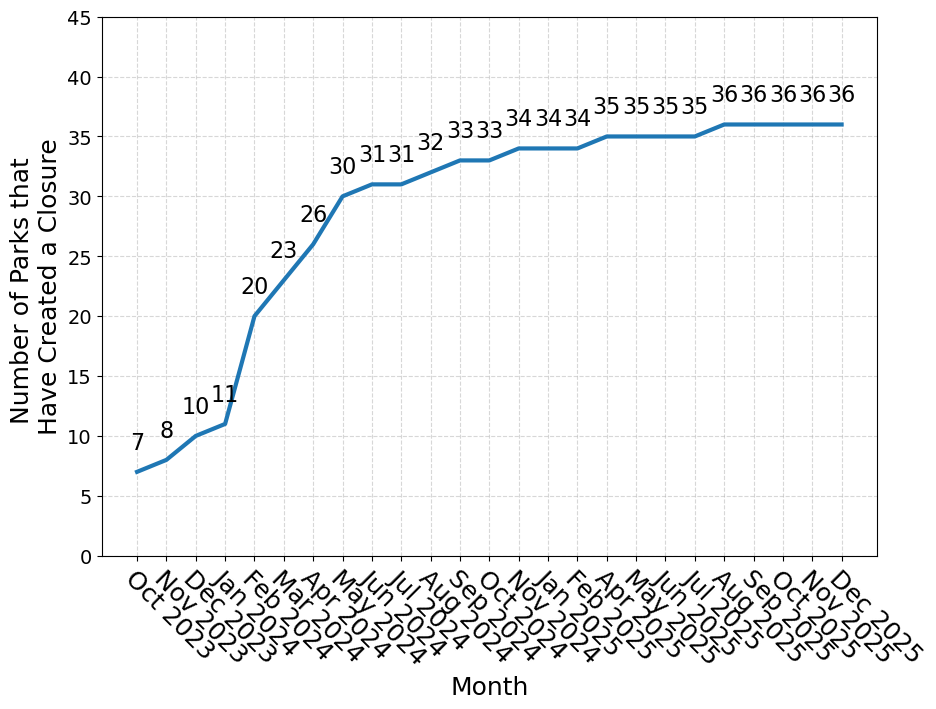

In [26]:
# Adjusting the figure size
fig = plt.subplots(figsize=(10, 7))

# Creating a plot
plt.plot(df_count_latest['months'], df_count_latest['count of parks'], linewidth=3)

for i, j in zip(df_count_latest['months'], df_count_latest['count of parks']):
    plt.text(i, j+1.5, f'{j}', ha='center', va='bottom', fontsize = 16)


# Adding a plot title and customizing its font size
#plt.title('Count of Parks that have use Road Closure & Incident App', fontsize=20)

# Adding axis labels and customizing their font size
plt.xlabel('Month', fontsize=18)
plt.ylabel('Number of Parks that \nHave Created a Closure', fontsize=18)

# Rotaing axis ticks and customizing their font size
plt.xticks(rotation=-45, fontsize=18, ha='left', rotation_mode="anchor")
plt.yticks(fontsize=14)
plt.ylim([0,max(df_count_latest['count of parks'])*1.25])
plt.grid(True, linestyle='--', alpha=0.5) 


output_dir = 'Figures/Combined across Regions'
os.makedirs(output_dir, exist_ok=True)

# Save the figure as a PNG file at 150 DPI
filename_string = 'running_alerts_count_' + str(today) + '.png'

output_path = os.path.join(output_dir, filename_string)
plt.savefig(output_path, dpi=150, bbox_inches='tight')

# Changing the plot resolution - zooming in the period from 15.12.2022 till 15.01.2023
#plt.xlim(pd.Timestamp('2023-09-1'), pd.Timestamp('2024-02-15'))
plt.plot()


In [27]:
df_count

,date,count of parks,year_month
0,2023-10-17,7,2023-10
1,2023-10-23,7,2023-10
2,2023-11-27,8,2023-11
3,2023-12-18,10,2023-12
4,2023-12-28,10,2023-12
5,2024-01-04,10,2024-01
6,2024-01-11,11,2024-01
7,2024-01-18,11,2024-01
8,2024-01-25,11,2024-01
9,2024-02-01,11,2024-02


## Alerts

In [28]:
#pull API using API key
alerts_url = "https://developer.nps.gov/api/v1/alerts?limit=1000&api_key=" + password_nps

response_API = requests.get(alerts_url)
#print(response_API.status_code)
data = response_API.text
df = json.loads(data)

with open("C:/Users/Drew.Quinton/Documents/GitHub/NPS-Emerging-Mobility/ARTNAPI.txt", "r", encoding="utf-8") as f:
    openai_api_key = f.read()

client = openai.OpenAI(
    api_key = openai_api_key,
    base_url="http://10.75.42.137:4000/" 
    )

In [29]:
id_list = []
url_list = []
title_list = []
parkCode_list = []
description_list = []
category_list = []
relatedRoadEvents_list = []
lastIndexedDate_list = []

for x in df['data']:
    #print(x)
    id_list.append(x['id'])
    url_list.append(x['url']) 
    title_list.append(x['title']) 
    parkCode_list.append(x['parkCode'].upper()) 
    description_list.append(x['description'])
    category_list.append(x['category']) 
    relatedRoadEvents_list.append(x['relatedRoadEvents'])
    lastIndexedDate_list.append(x['lastIndexedDate'])


In [30]:
alerts_df = pd.DataFrame({
    'id': id_list, 
    'url': url_list, 
    'title': title_list,
    'park alpha': parkCode_list,
    'description': description_list,
    'category': category_list,
    'relatedRoadEvents':relatedRoadEvents_list,
    'LastIndexedDate':lastIndexedDate_list
})

In [31]:
alerts_df2 = alerts_df.merge(parks,left_on='park alpha', right_on="alpha", how = "left")

alerts_df2['Road Closed Flag'] = None

In [32]:
road_closed_flag_list = []

user_prompt = 'tell me if the following is a description of a road closure. If so, respond with "yes", if not, respond with "no" : '

total_alerts = len(alerts_df2)
alerts_processed = 0

for description in alerts_df2['description']:
    
    response = client.chat.completions.create(
        model = "GPT-4.1-mini", # model to send to the proxy. One of: GPT-4o-Mini, GPT-4o, o1-Mini, o4-Mini, GPT-4.1, GPT-4.1-mini, GPT-4.1-nano,
        # text-embedding-3-small, text-embedding-3-large, MAI-DS-R1, Llama-3.2-Vision, GPT-5, GPT-5-Mini, GPT-5-Nano , gpt-4o-transcribe
        messages = [
            {
                "role": "system",
                "content": 'You will be given a series of phrases. These phrases are general alerts to users visiting national parks. Your job is to identify, alerts that indicate that a road, lane, or parking lot is closed or reduced in capacity. Do not identify trails that are closed or reduced in capacity.'
            },
            {
                "role": "user",
                "content": user_prompt + description
            }
        ]
    )
    closure_response = response.choices[0].message.content
   
    formatted_closure_response = re.sub(r'[^A-Za-z0-9\s]', '', closure_response.lower())
    road_closed_flag_list.append(formatted_closure_response)
    
    percent_complete = round(((alerts_processed/total_alerts)*100), 1)
    print(formatted_closure_response + "    |   " + str(percent_complete) + "% complete")
    alerts_processed = alerts_processed +1

n = len(road_closed_flag_list)

alerts_df2.iloc[:n, alerts_df2.columns.get_loc("Road Closed Flag")] = road_closed_flag_list

no    |   0.0% complete
no    |   0.2% complete
no    |   0.3% complete
no    |   0.5% complete
no    |   0.6% complete
no    |   0.8% complete
yes    |   0.9% complete
no    |   1.1% complete
no    |   1.2% complete
yes    |   1.4% complete
yes    |   1.5% complete
yes    |   1.7% complete
yes    |   1.9% complete
no    |   2.0% complete
no    |   2.2% complete
yes    |   2.3% complete
no    |   2.5% complete
yes    |   2.6% complete
no    |   2.8% complete
yes    |   2.9% complete
no    |   3.1% complete
no    |   3.3% complete
yes    |   3.4% complete
yes    |   3.6% complete
no    |   3.7% complete
no    |   3.9% complete
yes    |   4.0% complete
no    |   4.2% complete
no    |   4.3% complete
no    |   4.5% complete
yes    |   4.6% complete
yes    |   4.8% complete
no    |   5.0% complete
no    |   5.1% complete
no    |   5.3% complete
no    |   5.4% complete
no    |   5.6% complete
no    |   5.7% complete
yes    |   5.9% complete
no    |   6.0% complete
no    |   6.2% complete
no

In [33]:
# add to alerts tracker table
alerts_df2['date'] = today_string
alerts_df2_old = pd.read_csv("./alerts_api_tracker.csv")
alerts_df2_combined = pd.concat([alerts_df2, alerts_df2_old])
alerts_df2_combined.to_csv("alerts_api_tracker.csv", index=False)

C:\Users\Drew.Quinton\AppData\Local\Temp\ipykernel_57592\2453644686.py:3: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  alerts_df2_old = pd.read_csv("./alerts_api_tracker.csv")


In [34]:
alerts_df2.head()

,id,url,title,park alpha,description,category,relatedRoadEvents,LastIndexedDate,park,region,alpha,State,Road Closed Flag,date
0,A885D200-806E-439D-BA2C-E1B8F2A52A8B,,Memorial Plaza Closure,FLNI,The Memorial Plaza is currently closed due to ...,Information,[],2025-12-11 00:00:00.0,Flight 93 National Memorial,NER,FLNI,PA,no,2025-12-11
1,F6704B31-B168-4A6E-9E42-6F12321F1717,,"Weather Delay December 11, 2025",FLNI,The memorial is operating on a 2-hour weather ...,Park Closure,[],2025-12-11 00:00:00.0,Flight 93 National Memorial,NER,FLNI,PA,no,2025-12-11
2,760C1209-1E2D-4FAB-A92E-EB73978F8FEA,,Restrooms Closed at Jones Bridge starting Dece...,CHAT,Jones Bridge restrooms will be closed until fu...,Park Closure,[],2025-12-11 00:00:00.0,Chattahoochee River National Recreation Area,SER,CHAT,GA,no,2025-12-11
3,6B44267B-6FEE-48EE-A2BF-A11294BE01BA,,Old Post Office Tower is closed,NAMA,The Old Post Office Tower is currently closed ...,Information,[],2025-12-10 00:00:00.0,National Mall,NCR,NAMA,DC,no,2025-12-11
4,40A3A4C8-4406-484C-BD1A-9E7C05DA243D,,Old Post Office Tower is closed,PAAV,The Old Post Office Tower is currently closed ...,Information,[],2025-12-10 00:00:00.0,Pennsylvania Avenue National Historic Site,NCR,PAAV,DC,no,2025-12-11


##### Create a tracking table

NPS wants to know how many total road closures there are, and how many of these are included in the TDx feed. For this, we can subset our alerts table for road closure alerts then compare our 2 tables. 

In [35]:
# new entry with: date | total number of alerts | total number of closure | total parks with closures | 
# total number of 'related road events' | total parks with 'related road events' | % closures with 'related road event' | % of parks with 'related road events'

old_alerts_closure_tracker = pd.read_csv("./Alerts_Closure_Tracker.csv", encoding="utf-8-sig")

row = {}


row['Date'] = today_string
row['Total Number of Alerts'] = len(alerts_df2)
row['Unique parks with alerts']= len(alerts_df2['park alpha'].unique())
row['Total Identified Closures'] = num_closures = len(alerts_df2[alerts_df2['Road Closed Flag'] =='yes'])

row['Unique Parks with Closures'] = unique_parks_closures = alerts_df2.loc[alerts_df2['Road Closed Flag'] == 'yes', 'park alpha'].nunique()
row['Closures in the Closure feed'] = total_closures_in_feed = (
    alerts_df2['relatedRoadEvents'].notna() &
    (alerts_df2['relatedRoadEvents'].astype(str).str.strip() != '[]')
    ).sum()

row['Unique Parks using closure feed'] = unique_parks_with_closures_in_feed = alerts_df2.loc[(
    alerts_df2['relatedRoadEvents'].notna() &
    (alerts_df2['relatedRoadEvents'].astype(str).str.strip() != '[]')
    ), 'park alpha'].nunique()

row['percent identified closures in closure feed'] = percent_closures_in_feed = round(( total_closures_in_feed / num_closures) * 100, 1)
row['percent parks using feed'] = round((unique_parks_with_closures_in_feed / unique_parks_closures) * 100, 1)

new_alerts_closure_tracker = pd.DataFrame([row])

new_alerts_closure_tracker = new_alerts_closure_tracker.reindex(columns=old_alerts_closure_tracker.columns)

# print(total_alerts)
# print(unique_parks)
# print(num_closures)
# print(unique_parks_closures)
# print(total_closures_in_feed)
# print(unique_parks_with_closures_in_feed)
# print(percent_closures_in_feed)
# print(percent_parks_with_closures_in_feed)

new_alerts_closure_tracker = pd.concat([new_alerts_closure_tracker, old_alerts_closure_tracker])

new_alerts_closure_tracker.to_csv("Alerts_Closure_Tracker.csv", index=False)

new_alerts_closure_tracker

,Date,Total Number of Alerts,Unique parks with alerts,Total Identified Closures,Unique Parks with Closures,Closures in the Closure feed,Unique Parks using closure feed,percent identified closures in closure feed,percent parks using feed
0,2025-12-11,646,292,106,81,24,16,22.6,19.8
0,2025-11-05,842,352,110,86,19,13,17.3,15.1
1,2025-10-23,854,356,22,89,22,13,19.1,14.6


## Reach out to these parks regarding these alerts which should be in the closures feed:

In [ ]:
contact_parks_df = alerts_df2.head(0).copy()

mask = alerts_df2['Road Closed Flag'] == 'yes'
    
rows_to_add = alerts_df2.loc[mask, alerts_df2.columns].copy() 
contact_parks_df = pd.concat([contact_parks_df, rows_to_add], ignore_index=True)

contact_parks_df['date'] = today_string

#contact_parks_df.head()

contact_parks_df.to_csv('Contact_Parks/' + today_string + '_Contact_these_parks.csv', index=False)

,id,url,title,park alpha,description,category,relatedRoadEvents,LastIndexedDate,park,region,alpha,State,Road Closed Flag,date
0,5972081A-CAB6-43B7-BBF8-2DE0CCE40175,,Hoh Rain Forest Closed 12/10/25,OLYM,The Hoh Rain Forest area is closed due to loca...,Danger,[],2025-12-10 00:00:00.0,Olympic National Park,PWR,OLYM,WA,yes,2025-12-11
1,2D6862D7-9E2F-42EB-87CB-922FEB8A77E7,,Hurricane Ridge Road Status 12/8 - 12/11 - Closed,OLYM,"Hurricane Ridge Road is closed Monday, Decembe...",Caution,[],2025-12-10 00:00:00.0,Olympic National Park,PWR,OLYM,WA,yes,2025-12-11
2,1515FD22-F6FC-4682-AEE1-8AE16CC48FC3,,North Shore Road Closed 12/10/25,OLYM,North Shore Road is closed at mile marker 8 du...,Danger,[],2025-12-10 00:00:00.0,Olympic National Park,PWR,OLYM,WA,yes,2025-12-11
3,BDE82BC2-274C-40D9-BFBF-63ADA036D2BF,,Tour Road Closure,GUCO,"Due to new gate construction, the Park Tour Ro...",Park Closure,[],2025-12-10 00:00:00.0,Guilford Courthouse National Military Park,SER,GUCO,NC,yes,2025-12-11
4,CAE7E3F4-7E8F-4505-A4D3-60A2E1E05C52,,Road Closure: Pinnacle Road,CUGA,"As of 12/10/2025, the road to the Pinnacle Ove...",Park Closure,[],2025-12-10 00:00:00.0,Cumberland Gap National Historical Park,SER,CUGA,"KY, TN, VA",yes,2025-12-11


In [37]:
alerts_df2['relatedRoadEvents'].value_counts()

relatedRoadEvents
[]                                                                                                                                                                                                                                 622
[{'title': 'US 441 Newfound Gap Road Closure', 'id': '25ECC3D7-1F08-4BD0-A99E-33121256E17A', 'type': 'roadevent', 'url': 'https://www.nps.gov/grsm/planyourvisit/conditions.htm'}]                                                   1
[{'title': 'Inclement Weather Closure', 'id': '6488CF7F-1A82-4362-A2E7-1D282DD585FB', 'type': 'roadevent', 'url': 'https://www.nps.gov/blri/planyourvisit/conditions.htm'}]                                                          1
[{'title': 'SR165 Carbon River/Fairfax Bridge Closed', 'id': 'E5F3836C-7B40-4550-9650-4F50BF4CE491', 'type': 'roadevent', 'url': 'https://www.nps.gov/mora/planyourvisit/conditions.htm'}]                                           1
[{'title': 'Winter Seasonal Closures', 'id': '7DEB7CE1-F94

In [38]:
# filter our alerts table to only include road closures
alerts_df3 = alerts_df2.loc[alerts_df2['Road Closed Flag']=="Yes"]

# group by our park-related fields and create sub-lists for our alert info
alerts_df3_grouped = alerts_df3.groupby(['park alpha', 'park',
        'State','region'])[['title', 'description', 'category',
       'relatedRoadEvents']].agg(lambda x: list(x)).reset_index()

In [39]:
# create list of the unique park alphas in our two tables
has_alerts = set(alerts_df3['park alpha'])
has_tdx = set(merged_df['alpha'])

# create sublists of overlapping alphas, only in alerts table, only in TDx table
has_both = has_alerts.intersection(has_tdx)
only_alerts = has_alerts - has_tdx
only_tdx = has_tdx - has_alerts

#create empty data frame then populate the rows
status = pd.DataFrame(columns=['Park Alpha', 'Status'])
status['Park Alpha'] = list(has_both) + list(only_alerts) + list(only_tdx)
status['Status'] = (['Using TDx feed and alerts'] * len(has_both)) + (['Only using alerts'] * len(only_alerts)) + (['Only using TDx feed'] * len(only_tdx))

In [40]:
# join our status table with our alerts table
status_merged = status.merge(alerts_df3_grouped,left_on='Park Alpha', right_on="park alpha", how = "left")

In [41]:
status_merged['Status'].value_counts()

Status
Only using TDx feed    9
Name: count, dtype: int64

In [42]:
status_merged.to_csv("combined_status.csv", index=False)

#### Create a tracker spreadsheet with the combined updates

In [43]:
df_update_combined = status_merged
df_update_combined['date'] = today_string

In [44]:
df_old_update = pd.read_csv("./combined_status_tracker.csv")

In [45]:
df_update_combined = pd.concat([df_update_combined, df_old_update])

In [46]:
df_update_combined.to_csv("combined_status_tracker.csv", index=False)